# Homework 5

**Zachary Qian**

**UCLA ID: 905211936**

I affirm that I personally wrote the text, code, and comments in this homework assignment.

## Problem 1: Faceted Histogram

Run the following code block to define a function which generates two 1-dimensional `numpy` arrays. The first array, called `groups`, consists of random integers between `0` and `n_groups-1`, inclusive. The second array, called `data`, consists of real numbers. Each of these arrays has length `n`.   

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def create_data(n, n_groups):
    """
    generate a set of fake data with group labels. 
    n data points and group labels are generated. 
    n_groups controls the number of distinct groups. 
    Returns an np.array() of integer group labels and an 
    np.array() of float data. 
    """
    
    # random group assignments as integers between 0 and n_groups-1, inclusive
    groups = np.random.randint(0, n_groups, n)
    
    # function of the groups plus gaussian noise (bell curve)
    data   = np.sin(groups) + np.random.randn(n)
    
    return(groups, data)

## Part A

Write a function called `facet_hist()`. This function should accept five arguments: 

1. `groups`, the `np.array` of group labels as output by `create_data()`. 
2. `data`, the `np.array` of data as output by `create_data()`.
3. `m_rows`, the number of desired rows in your faceted histogram (explanation coming). 
4. `m_cols`, the number of desired columns in your faceted histogram (explanation coming). 
5. `figsize`, the size of the figure. 

Your function will create faceted histograms -- that is, a separate axis and histogram for each group. For example, if there are six groups in the data, then you should be able to use the call 

```
facet_hist(groups, data, m_rows = 2, m_cols = 3, figsize = (6,4))
```

to create a plot like this: 

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/faceted_histogram.png
" alt="An array of six histograms, depicting bell-curve data, with two rows and three columns. Each histogram is labeled with one of the six group labels." width="400px">
</figure>

It's fine if your group labels run left-to-right (so that the top row has labels 0, 1, and 2 rather than 0, 2, 4). 


You should also be able to change the orientation by modifying `m_rows`, `m_cols`, and `figsize`. 

```
facet_hist(groups, data, m_rows = 3, m_cols = 2, figsize = (4,6))
```

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/faceted_histogram_2.png
" alt="An array of six histograms, depicting bell-curve data, with three rows and two columns. Each histogram is labeled with one of the six group labels." width="300px">
</figure>

### Requirements: 

1. Your function should work **whenever `m_rows*m_cols` is equal to the total number of groups.** Your function should first check that this is the case, and raise an informative `ValueError` if not. You may assume that there is at least one data point for each group label in the data supplied. 
2. You should include a horizontal axis label (of your choice) along **only the bottom row** of axes. 
3. You should include a vertical axis label (e.g. "Frequency") along **only the leftmost column of axes.**
4. Each axis should have an axis title of the form "Group X", as shown above. 
5. Comments and docstrings! 

### Hints

- If your plots look "squished," then `plt.tight_layout()` is sometimes helpful. Just call it after constructing your figure, with no arguments. 
- Integer division `i // j` and remainders `i % j` are helpful here.  


In [93]:
# your function facet_hist() here
def facet_hist(groups, data, m_rows, m_cols, figsize, **kwargs):
    """
    facet_hist() will display an m_rows X m_cols "matrix" of histograms that will be grouped by the given groups
    parameter. 
    
    it also will first check for invalid dimensions, then proceed to create the plots by using a temp array 
    that is reset after every iteration from mcols
    
    we use a counter variable to keep track of the groupings as well
    
    added **kwargs to our function parameter list to accept more parameters that aren't explicitly in fxn defn
    
    """
    if m_rows*m_cols != len(set(groups)):
        raise ValueError("Incorrect dimensions.")


    fig, ax = plt.subplots(m_rows, m_cols, figsize = figsize) #create m_rows by m_column subplots
    plt.tight_layout() #make less squished subplots
    #ax.set(xlabel = "x", ylabel = "Frequency") #set the axes labels as described
    #add titles to each name
    ctr = 0 #counter 
    temp = np.array([]) #instantiate an np.array
    for i in range(m_rows): #loop through rows
        for j in range(m_cols): #loop through columns
            ax[i,j].set(xlabel = "x", ylabel = "Frequency",
                        title = "Group " + str(ctr)) #Add group X for each plot's title, and appropriate axes labels
            temp = data[groups==ctr] #set temp array to the data corresponding to the group indices matching our ctr
            ax[i,j].hist(temp, **kwargs) #call histogram, adds **kwargs argument to accept more parameters
            plt.tight_layout() #make it less squished
            ctr+=1 #increment our counter
        
        
    

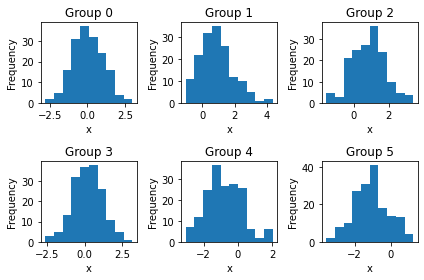

In [80]:
# test code -- run this!
groups, data = create_data(1000, 6)
facet_hist(groups, data, 2, 3, figsize = (6, 4))

In [25]:
# test code -- run this!
groups, data = create_data(3000, 8)
#facet_hist(groups, data, 4, 2, figsize = (4, 7))

## Part B

Modify your function (it's ok to modify it in place, no need for copy/paste) so that it accepts additional `**kwargs` passed to `ax.hist()`. For example,  

```
facet_hist(groups, data, 2, 3, figsize = (6, 4), alpha = .4, color = "firebrick")
```

should produce 

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/faceted_histogram_3.png
" alt="An array of six histograms, depicting bell-curve data, with three rows and two columns. Each histogram is labeled with one of the six group labels. The histograms are now colored pink and are slightly transparent.|" width="400px">
  <figcaption><i>Example output.</i></figcaption>
</figure>

You should be able to run this code **without defining parameters `alpha` and `color` for `facet_hist()`**. 

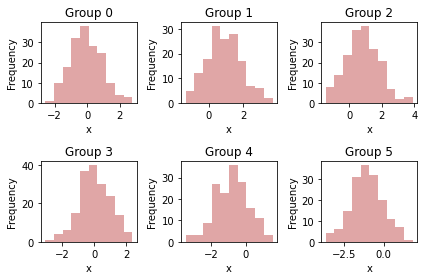

In [92]:
# test code -- run this! 
groups, data = create_data(1000, 6)
facet_hist(groups, data, 2, 3, figsize = (6, 4), alpha = .4, color = "firebrick")

## Problem 2: Scatterplot Matrices

Run the following code to download, import, and display a data set from the 2019 World Happiness Report. 

In [73]:
import urllib
import pandas as pd
def retrieve_data(url):
    """
    Retrieve a file from the specified url and save it in a local file 
    called data.csv. The intended values of url are:     
    """
    
    # grab the data and parse it
    filedata = urllib.request.urlopen(url) 
    to_write = filedata.read()
    
    # write to file
    with open("data.csv", "wb") as f:
        f.write(to_write)
        
retrieve_data("https://philchodrow.github.io/PIC16A/datasets/world_happiness_report/2019.csv")
happiness = pd.read_csv("data.csv")
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


What you're seeing right now is a `pandas` data frame. You don't have to know what that is right now -- no worries! Just observe the following: 

1. Each row corresponds to a country or region. 
2. The `Score` column is the overall happiness score of the country, evaluated via surveys. 
3. The other columns give indicators of different features of life in the country, including GDP, level of social support, life expectancy, freedom, generosity of compatriots, and perceptions of corruption in governmental institutions. 

 You can extract each of these columns using dictionary-like syntax: 
 
 ```python
 happiness["Score"]
 ```
 
 ```
0      7.769
1      7.600
2      7.554
3      7.494
4      7.488
       ...  
151    3.334
152    3.231
153    3.203
154    3.083
155    2.853
Name: Score, Length: 156, dtype: float64
 ```
 
Technically, this output is a `pandas` `Series`; however, in this context (and most others) it's fine to simply think of it as a 1-dimensional `np.array()`. 

### Part A

As a warmup, create a scatterplot of the overall `Score` column against a numerical column of your choice. Give the horizontal and vertical axes appropriate labels. Discuss your result. Is there a correlation? Does that correlation make sense to you? 

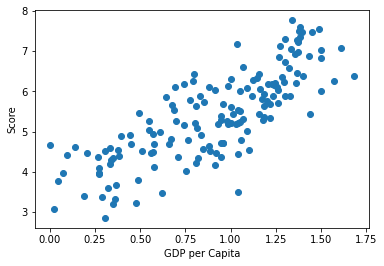

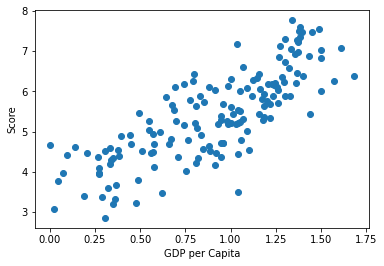

In [76]:
# your plotting code here
fig, ax = plt.subplots(1) #create m_rows by m_column subplots
ax.set(xlabel = "GDP per Capita", ylabel = "Score") #add labels
ax.scatter(happiness["GDP per capita"], happiness["Score"]) #scatterplot execution
fig


[Discuss here]

Note that there exists a strong positive correlation between GDP per capita and happiness score.

This **generally** makes sense. Because a higher GDP per capita usually indicates a wealthier country, civilians living in said country *generally* have more accessibility to resources, wealth, etc (NOTE: emphasis on usually) than countries with a lower GDP per capita. This generally means they have more income and disposable income if wealthy enough. This usually leads to a higher happiness due to the lesser chance of being impoverished.

## Part B

That plot you made may have helped you understand whether or not there's a relationship between the overall happiness score and the variable that you chose to plot. However, there are several variables in this data set, and we don't want to manually re-run the plot for each pair of variables. Let's see if we can get a more systematic view of the correlations in the data. 

Write a function called `scatterplot_matrix()`, with arguments `cols` and `figsize`. The `cols` argument should be a list of strings, each of which are the name of one of the columns above, for example `cols = ["Score", "GDP per capita", "Social support"]`. Your function should create a *scatterplot matrix*, like this:  

```python
cols = ["Score", 
        "GDP per capita", 
        "Social support"]
           
scatterplot_matrix(cols,figsize = (7,7))
```

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/scatterplot_matrix.png" alt="A 3x3 grid of scatterplots, showing relationships between Score and GDP, Score and Social support, and GDP and Social support. The diagonal is blank. All three variables are strongly correlated with each other." width="400px">
</figure>

There is a separate scatterplot for each possible pair of variables. In fact, there are two: one where the first variable is on the horizontal axis, and one where it's on the vertical axis. Some analysts prefer to remove half the plots to avoid redundancy, but you don't have to bother with that. The diagonal is empty, since there's no point in investigating the relationship between a variable and itself. 

Don't forget comments and docstrings! 

In [118]:
np.corrcoef(happiness["Score"], happiness["GDP per capita"])[0][1]

0.7938828678781278

In [123]:
# your function scatterplot_matrix here
def scatterplot_matrix(cols, figsize):
    """
    To avoid re-running multiple plots, we can make a "matrix" ofscatterplots that compare each label with one another
    in order to observe any trends.
    
    Similar to #1, except in this case, we just set our labels differently, and decide not to plot anything for 
    comparison trends of the same value in cols (like GDP vs GDP is trivial).
    
    We add correlation coefficients for reference, and plot the scatterplots
    """
    
    fig, ax = plt.subplots(len(cols),len(cols),figsize = figsize) #initialize the plots
    for i in range(len(cols)): #loop through rows
        for j in range(len(cols)): #loop through columns
            corr = np.corrcoef(happiness[cols[i]],happiness[cols[j]])[0][1] #compute correlation,
            #take the non trivial correlation value
            ax[i,j].set(xlabel = "", ylabel = cols[j], title = cols[i]) #set labels for general plots
            if cols[i] != cols[j]:  #if the comparison for scatterplots is NOT trivial (i.e. not against each other)
                ax[i][j].set(xlabel = r"$\rho$ = " + str(np.round(corr, 2)), ylabel = cols[j], title = cols[i])
                #add label for the rho value for correlation coefficient rounded to 2 decimal pts
                ax[i,j].scatter(happiness[cols[i]], happiness[cols[j]]) #plot scatter plot
                plt.tight_layout() #make less squished viz
                fig
            
                
    

In [98]:
#TEST WORK:

len(cols)
for i in range(len(cols)):
    print( cols[i])

Score
GDP per capita
Social support


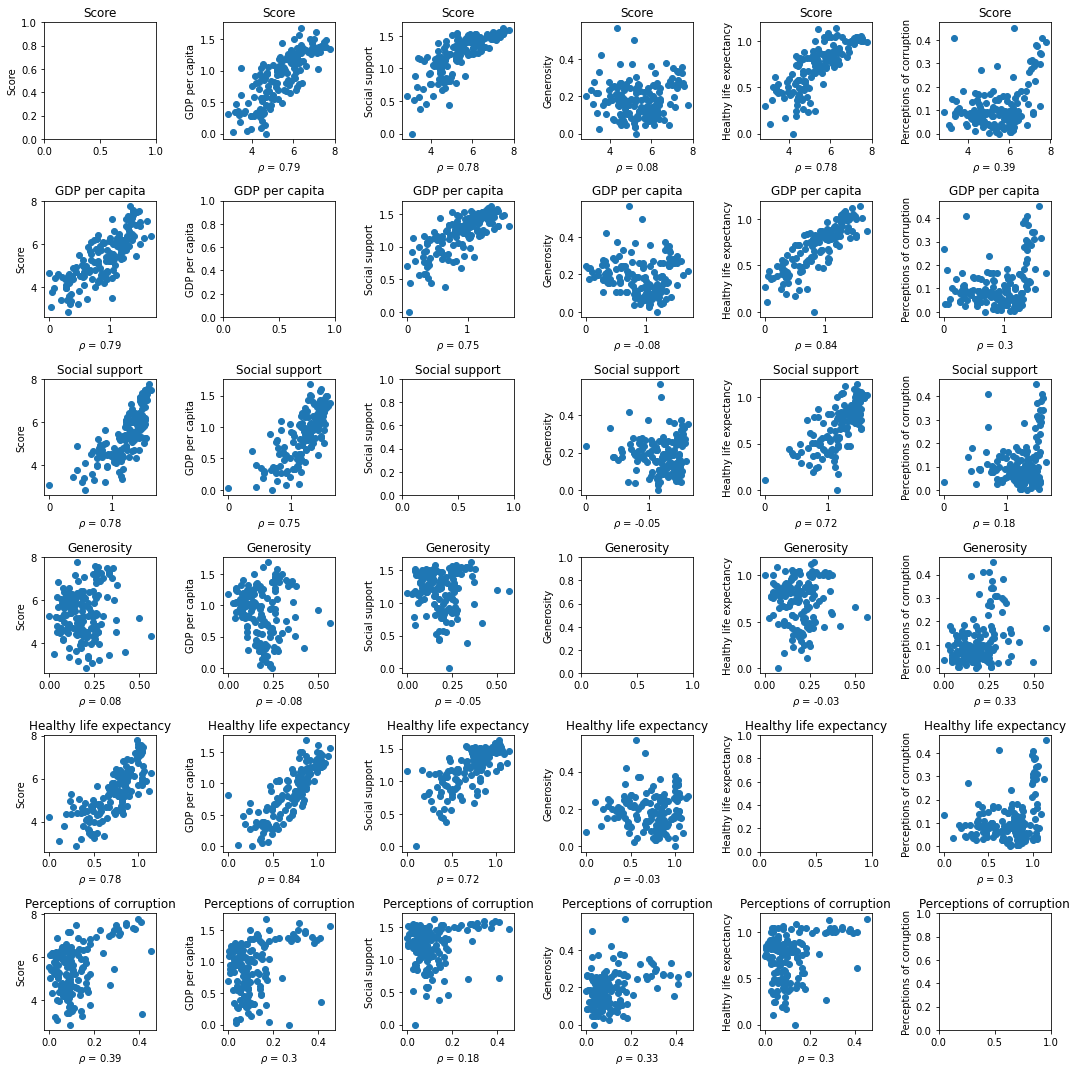

In [132]:
# test your code, several times if needed, and discuss the correlations you observe. 
# Add code cells if needed to show multiple outputs. 
cols = ["Score", 
        "GDP per capita", 
        "Social support", "Generosity", "Healthy life expectancy", "Perceptions of corruption"]

scatterplot_matrix(cols,figsize = (15,15))

## Part C

The *correlation coefficient* is a measure of linear correlation between two variables. The correlation coefficient between $X$ and $Y$ is high if $X$ tends to be high when $Y$ is, and vice versa. Correlation coefficients lie in the interval $[-1, 1]$. 

`numpy` provides a function to conveniently compute the correlation coefficient between two or more variables. Find it, and then use it to add "captions" (as horizontal axis labels) to each panel of your plot giving the correlation coefficient between the plotted variables. For example, 

```python
cols = ["Score", 
        "GDP per capita", 
        "Social support"]
           
scatterplot_matrix(cols,figsize = (7,7))
```

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/scatterplot_matrix_with_cors.png" alt="A 3x3 grid of scatterplots, showing relationships between Score and GDP, Score and Social support, and GDP and Social support. The diagonal is blank. All three variables are strongly correlated with each other. Correlation coefficients between 0.70 and 0.84 lie beneath each plot." width="400px">
</figure>

It's not required that you add the Greek letter $\rho$ (the classical symbol for correlation coefficients), but if you do want to, here's how. You can also tweak the rounding as desired.  

```python
ax.set(xlabel = r"$\rho$ = " + str(np.round(my_number, 2)))
```

It's fine to just modify your code from Part B and re-run the examples -- no need for copy/paste. 

Run your code on several different subsets of the columns. Add code cells as needed. Discuss your findings. What positive correlations do you observe? Do they make sense? Are there any negative correlations? Do the quantitative results match what you see "by eye"? 

If you were going to create a model to attempt to predict overall happiness from other indicators, which columns would you use? Why? 

**ANSWER:**

I find that between social support, happiness score, Health life expectancy, and GDP per Capita, there exists strong positive correlations, which makes intuitive sense. When I compared generosity, I found very very little correlation at all in both directions (approx 0.08 and -0.08). For the ones I tested, I did not find any negative correlations besides a week correlation for generosity vs HLE, GDP, and social support, but there could very much be some stronger ones.

I can see the correlations from social support, happiness score, Health life expectancy, and GDP per Capita pretty clearly (trendwise).



## Problem 3: Plotting Time Series

Run the following code to download two time series data sets: 
- Historical data on the Dow Jones Industrial Average (a composite performance measure of the US stock market), retrieved from Yahoo Finance. 
- Cumulative COVID19 cases over time, from the [New York Times](https://github.com/nytimes/covid-19-data). 

In [127]:
# run this code
# if you get errors, you may need to run the first code block from Problem 2 first. 

import datetime

retrieve_data("https://philchodrow.github.io/PIC16A/datasets/DJI.csv")
DJI = pd.read_csv("data.csv")
DJI['Date'] = pd.to_datetime(DJI['Date'])

retrieve_data("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv")
COVID = pd.read_csv("data.csv")
COVID['date'] = pd.to_datetime(COVID['date'])

## Part A

The series `COVID['cases']` is essentially a `numpy` array containing the cumulative case counts over time. The COVID19 case data  is cumulative, but we would like to see the number of new cases per day (i.e. as in [this kind of plot](https://www.google.com/search?q=covid+stats)). Check the documentation for the `np.diff` function and figure out what it does. Use it appropriately to construct a new array, called `per_day`, giving the number of new cases per day. Then, make a new array called `per_day_date` that gives the appropriate date for each case count. In particular, you will need to ensure that `per_day` and `per_day_date` have the same shape. 

In [140]:
COVID.head()

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


In [142]:
# your solution here
#np.diff takes the difference along a given axis of a np array
per_day = np.array([1]) #add 1 because 1-0 = 1, we need one to get a case even
per_day = np.append(per_day,np.diff(COVID['cases'])) 
per_day

array([     1,      0,      0,      1,      1,      2,      0,      0,
            0,      1,      1,      1,      3,      0,      0,      1,
            0,      0,      0,      0,      1,      0,      1,      1,
            0,      0,      0,     10,      0,      0,      2,      3,
            0,      0,     13,      2,     15,      0,      5,      5,
           18,     16,     21,     36,     67,     83,    117,    119,
          201,    270,    245,    405,    556,    674,    702,    907,
         1399,   2444,   4043,   5619,   6516,   8545,  10432,  10433,
        14634,  16998,  17330,  21066,  18520,  21469,  24506,  26930,
        29717,  32318,  35099,  25616,  30916,  30337,  31820,  34699,
        33473,  31720,  27143,  25769,  26691,  30033,  31613,  31509,
        28398,  25334,  27395,  25514,  28831,  33776,  36741,  34408,
        26735,  23197,  24651,  26555,  30357,  33970,  29474,  26140,
        21962,  23709,  24506,  28478,  27648,  24868,  20317,  17621,
      

In [139]:
per_day_date = COVID["date"]
per_day_date

0     2020-01-21
1     2020-01-22
2     2020-01-23
3     2020-01-24
4     2020-01-25
         ...    
297   2020-11-13
298   2020-11-14
299   2020-11-15
300   2020-11-16
301   2020-11-17
Name: date, Length: 302, dtype: datetime64[ns]

## Part B

Create a figure with two very wide axes, one on top of the other (i.e. two rows, one column). Use the `sharex` argument of `plt.subplots()` to ensure that these two plots will share the same horizontal axis. 

Then: 

1. On the upper axis, plot the Dow Jones Industrial Average over time. For the horizontal axis use `DJI['Date']`; the for the vertical use `DJI['Close']`. 
2. On the lower axis, plot the variables `per_day_date` and `per_day` to visualize the progress of the COVID19 pandemic over time. Use a different color for the trendline. 

Give your plot horizontal and vertical axis labels. 

Text(2020-10-01 00:00:00, 24000, 'Inflection point')

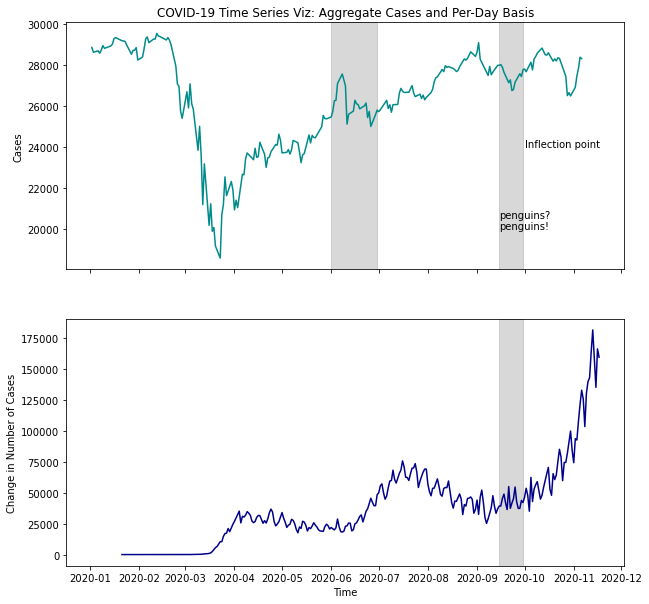

In [175]:
# your plotting code for parts B-E here

fig, ax = plt.subplots(2,1,sharex=True, figsize = (10,10)) #initialize plots, make larger
ax[0].set(title = "COVID-19 Time Series Viz: Aggregate Cases and Per-Day Basis",ylabel ="Cases" ) #add caption for top
ax[1].set(xlabel = "Time",ylabel = "Change in Number of Cases") #add labels for bottom
ax[0].plot(DJI['Date'],DJI['Close'],color ="darkcyan") #added some color
ax[1].plot(per_day_date,per_day, color = "darkblue") #added some color
ax[0].axvspan(datetime.datetime(2020,6,1),datetime.datetime(2020,6,30), alpha = .3, color = "gray") #highlight section
ax[0].text(datetime.datetime(2020,9,15), 20000, "penguins?\npenguins!") #caption
ax[1].axvspan(datetime.datetime(2020,9,15),datetime.datetime(2020,9,30), alpha = .3, color = "gray") 
#highlight infleciton pts at both plots
ax[0].axvspan(datetime.datetime(2020,9,15),datetime.datetime(2020,9,30), alpha = .3, color = "gray")
ax[0].text(datetime.datetime(2020,10,1), 24000, "Inflection point") #caption for infleciton




## Part C

The command 

```
ax[0].axvspan(datetime.datetime(2020,6,1),datetime.datetime(2020,6,30), alpha = .3, color = "gray")
```

will add a simple rectangular shade which can be used to highlight specific portions of a time-series. In the given code, this shade runs through the month of June 2020. Add at least two such rectangular shades to your figure corresponding to important time intervals. You can put two shades on one axis, or one on each. If you're not sure what time periods are important, just choose intervals at random. Feel free to modify the color and transparency as desired. You can modify your figure code from Part B -- no need for copy/paste. 

## Part D

The command 

```
ax[0].text(datetime.datetime(2020,9,15), 22000, "penguins?\npenguins!")
```

will add a fun text annotation to your plot, with the first letter in horizontal position corresponding to September 15th, and at vertical position 22,000. Annotate each of your shaded regions with a few words describing their significance. Again, just modify your Part B code. 

## Part E

Add an overall title, spruce up your axis labels, and add anything else you think will make the plot look good. Again, you can just modify your Part B code, without copy/paste. 

Then, submit a job application at www.FiveThirtyEight.com and show Nate Silver your cool data visualization. 

**Fun fact: Nate Silver ignored me so many times when I was making my capstone project during an internship during my senior year of highschool until my advisor at UPenn emailed him... Seems like a nice guy, though.**